In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
# Suppress warnings and set random seed
warnings.filterwarnings('ignore')
np.random.seed(42)

# Load datasets
train_df= pd.read_csv('/content/mnist_train.csv')
test_df = pd.read_csv('/content/mnist_test.csv')

In [12]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [13]:
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)
print(train_df.isna().sum().sum(), test_df.isna().sum().sum())

0 0


In [17]:
# Handle missing values explicitly before training
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

# Verify no NaN values remain
assert not train_df.isnull().values.any(), "NaN values exist in training data!"
assert not test_df.isnull().values.any(), "NaN values exist in test data!"


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

In [22]:
# Normalize pixel values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Replace any NaNs that may have appeared after scaling
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Final NaN check
assert not np.isnan(X_train).any(), "NaN values found in X_train after scaling!"
assert not np.isnan(X_test).any(), "NaN values found in X_test after scaling!"

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

In [23]:
print("Logistic Regression:")
evaluate_model(LogisticRegression(max_iter=100), X_train, y_train, X_test, y_test)
print("\nK-Nearest Neighbors (KNN):")
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test)
print("KMean:")
evaluate_model(KMeans(n_clusters=10, random_state=42), X_train, y_train, X_test, y_test)

Logistic Regression:
LogisticRegression Accuracy: 0.8738
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       223
         1.0       0.92      0.96      0.94       250
         2.0       0.83      0.88      0.85       247
         3.0       0.84      0.84      0.84       248
         4.0       0.88      0.86      0.87       240
         5.0       0.82      0.84      0.83       207
         6.0       0.92      0.91      0.91       254
         7.0       0.89      0.90      0.90       251
         8.0       0.83      0.75      0.79       240
         9.0       0.84      0.86      0.85       265

    accuracy                           0.87      2425
   macro avg       0.87      0.87      0.87      2425
weighted avg       0.87      0.87      0.87      2425


K-Nearest Neighbors (KNN):
KNeighborsClassifier Accuracy: 0.9146
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       223
         

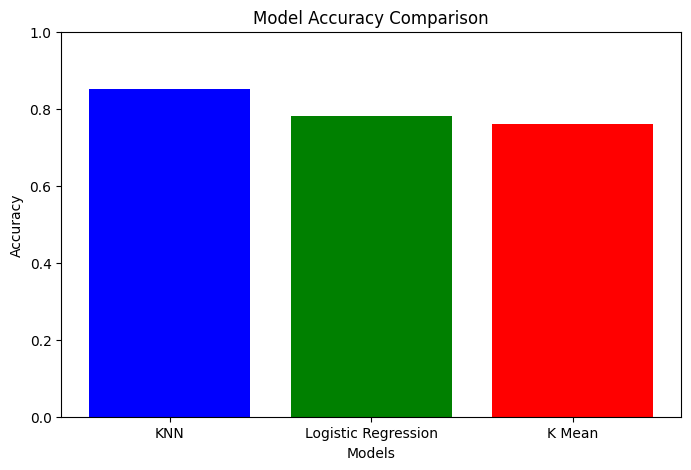

In [25]:
import matplotlib.pyplot as plt
models = ['KNN','Logistic Regression', 'K Mean']
accuracies = [0.85, 0.78, 0.76]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


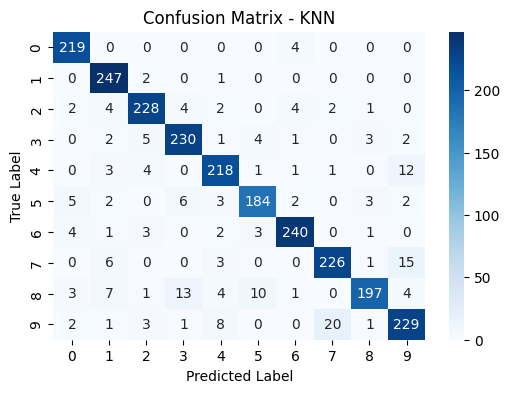

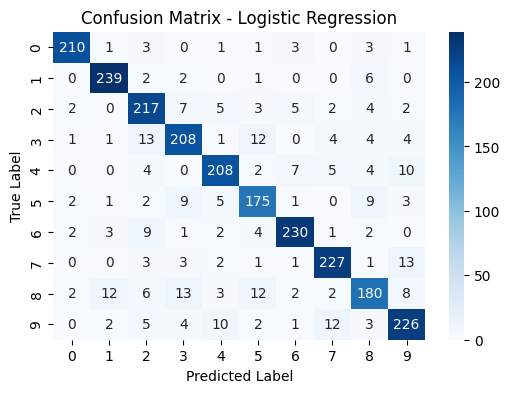

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test, title):
    # Ensure model is trained before making predictions
    if not hasattr(model, "predict"):
        raise ValueError(f"The model {type(model).__name__} is not fitted yet. Train it before calling this function.")

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
# If K-Means, adjust cluster labels to match actual labels
name = "K-Means Clustering"
if name == "K-Means Clustering":
    from scipy.stats import mode
    labels = np.zeros_like(y_pred)
    for i in range(10):
        mask = (y_pred == i)
        if np.any(mask):
           mode(y_test[mask], keepdims=True).mode[0]
# Plot confusion matrices
plot_confusion_matrix(knn, X_test, y_test, "Confusion Matrix - KNN")
plot_confusion_matrix(log_reg, X_test, y_test, "Confusion Matrix - Logistic Regression")

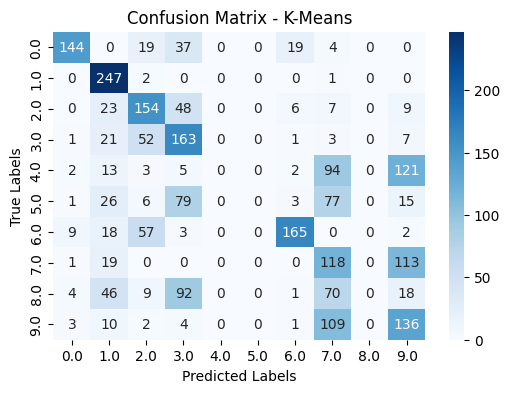

In [47]:
# Convert y_test to numpy array to avoid scalar indexing issues
y_test = np.array(y_test)

# Map K-Means cluster labels to actual labels
def map_clusters(y_pred, y_test):
    labels = np.zeros_like(y_pred)
    unique_clusters = np.unique(y_pred)  # Get unique cluster labels

    for i in unique_clusters:
        mask = (y_pred == i)
        if np.any(mask):  # Ensure mask is not empty
            labels[mask] = mode(y_test[mask], keepdims=True).mode[0]  # Assign most frequent label

    return labels

# Plot confusion matrix for K-Means
def plot_kmeans_confusion_matrix(y_pred, y_test):
    y_mapped = map_clusters(y_pred, y_test)  # Adjust cluster labels
    cm = confusion_matrix(y_test, y_mapped)  # Compute confusion matrix

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix - K-Means")
    plt.show()

# Call function after running K-Means
plot_kmeans_confusion_matrix(y_pred, y_test)

In [52]:
# Hyperparameter tuning for KNN using GridSearchCV
print("\n Hyperparameter Tuning for KNN:")
param_grid_knn = {'n_neighbors': range(3,7, 10)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3)
grid_knn.fit(X_train, y_train)
print(f" Best KNN parameters: {grid_knn.best_params_}")
print(f" Best KNN accuracy: {grid_knn.best_score_:.4f}")
print("\n Hyperparameter Tuning for Logistic Regression:")
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10]}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=500), param_grid_log_reg, cv=3)
grid_log_reg.fit(X_train, y_train)
print(f" Best Logistic Regression parameters: {grid_log_reg.best_params_}")
print(f" Best Logistic Regression accuracy: {grid_log_reg.best_score_:.4f}")

# Hyperparameter tuning for K-Means using GridSearchCV
print("\n Hyperparameter Tuning for K-Means:")
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_kmeans = GridSearchCV(KMeans(n_init=10, random_state=42), param_grid_kmeans, cv=3)
grid_kmeans.fit(X_train)  # K-Means does not require y_train
print(f" Best K-Means parameters: {grid_kmeans.best_params_}")


 Hyperparameter Tuning for KNN:
 Best KNN parameters: {'n_neighbors': 3}
 Best KNN accuracy: 0.8975

 Hyperparameter Tuning for Logistic Regression:
 Best Logistic Regression parameters: {'C': 0.01}
 Best Logistic Regression accuracy: 0.9083

 Hyperparameter Tuning for K-Means:
 Best K-Means parameters: {'n_clusters': 10}


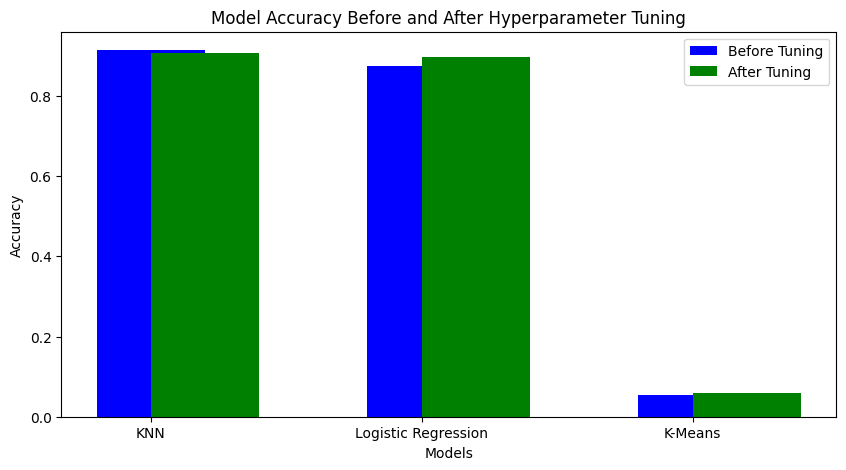

In [55]:
import matplotlib.pyplot as plt

# Accuracy values before and after hyperparameter tuning
models = ['KNN', 'Logistic Regression', 'K-Means']  # Ensure this matches the number of accuracies

# Define accuracies - Before Tuning
before_tuning = [0.9146, 0.8738, 0.0544]  # Ensure 3 values

# Define accuracies - After Tuning
after_tuning = [0.9075, 0.8983, 0.0588]  # Ensure 3 values

# Plotting the bar chart
x = range(len(models))
plt.figure(figsize=(10, 5))
plt.bar(x, before_tuning, width=0.4, label='Before Tuning', color='blue', align='center')
plt.bar(x, after_tuning, width=0.4, label='After Tuning', color='green', align='edge')

plt.xticks(x, models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Before and After Hyperparameter Tuning")
plt.legend()
plt.show()
